In [6]:
from utils import print_score

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_auc_score, f1_score, auc, precision_score, recall_score, accuracy_score

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_imb_pipeline

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
from utils import print_score

In [2]:
data = pd.read_csv("./data/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
X = data.drop('Class', axis=1)
y = data['Class']

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.20, random_state=42)

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)
X_test_scaled = scaler.transform(X_test)

**Modelos SVM Base (`kernel='linear', 'rbf'`)**

In [7]:
svm_lineal = SVC(kernel='linear', random_state=42)

svm_lineal.fit(X_train, y_train)

print_score(svm_lineal, X_train, y_train, X_val, y_val, train=True)
print_score(svm_lineal, X_train, y_train, X_val, y_val, train=False)

Train Result:
Accuracy Score: 99.86%
_______________________________________________
CLASSIFICATION REPORT:
                       0           1  accuracy      macro avg   weighted avg
precision       0.998814    0.708075  0.998557       0.853444       0.998288
recall          0.999742    0.345455  0.998557       0.672598       0.998557
f1-score        0.999278    0.464358  0.998557       0.731818       0.998309
support    181946.000000  330.000000  0.998557  182276.000000  182276.000000
_______________________________________________
Confusion Matrix: 
 [[181899     47]
 [   216    114]]

Validation Result:
Accuracy Score: 99.89%
_______________________________________________
CLASSIFICATION REPORT:
                     0          1  accuracy     macro avg  weighted avg
precision      0.99910   0.696970  0.998881      0.848035      0.998675
recall         0.99978   0.359375  0.998881      0.679578      0.998881
f1-score       0.99944   0.474227  0.998881      0.736833      0.998702
su

In [8]:
svm = SVC(kernel='rbf', random_state=42)

svm.fit(X_train, y_train)

print_score(svm, X_train, y_train, X_val, y_val, train=True)
print_score(svm, X_train, y_train, X_val, y_val, train=False)

Train Result:
Accuracy Score: 99.82%
_______________________________________________
CLASSIFICATION REPORT:
                       0      1  accuracy      macro avg   weighted avg
precision       0.998190    0.0   0.99819       0.499095       0.996382
recall          1.000000    0.0   0.99819       0.500000       0.998190
f1-score        0.999094    0.0   0.99819       0.499547       0.997285
support    181946.000000  330.0   0.99819  182276.000000  182276.000000
_______________________________________________
Confusion Matrix: 
 [[181946      0]
 [   330      0]]

Validation Result:
Accuracy Score: 99.86%
_______________________________________________
CLASSIFICATION REPORT:
                      0     1  accuracy     macro avg  weighted avg
precision      0.998596   0.0  0.998596      0.499298      0.997193
recall         1.000000   0.0  0.998596      0.500000      0.998596
f1-score       0.999297   0.0  0.998596      0.499649      0.997894
support    45505.000000  64.0  0.998596  45

**Modelos con `class_weight='balanced'`**

Se entrena SVM con ajuste de pesos automáticos, class_weight='balanced' le asigna un mayor peso a las clases minoritarias de forma automática.

In [ ]:
svm_base = SVC(kernel='linear', class_weight='balanced', random_state=42)

svm_base.fit(X_train, y_train)

print_score(svm_base, X_train, y_train, X_val, y_val, train=True)
print_score(svm_base, X_train, y_train, X_val, y_val, train=False)

In [21]:
svm_base = SVC(kernel='rbf', class_weight='balanced', random_state=42)

svm_base.fit(X_train, y_train)

print_score(svm_base, X_train, y_train, X_val, y_val, train=True)
print_score(svm_base, X_train, y_train, X_val, y_val, train=False)

Train Result:
Accuracy Score: 68.42%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.971353    0.196648  0.684242     0.584000      0.900925
recall        0.672500    0.801667  0.684242     0.737083      0.684242
f1-score      0.794761    0.315824  0.684242     0.555292      0.751221
support    6000.000000  600.000000  0.684242  6600.000000   6600.000000
_______________________________________________
Confusion Matrix: 
 [[4035 1965]
 [ 119  481]]

Validation Result:
Accuracy Score: 60.23%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.906137    0.085890  0.602273     0.496013      0.831569
recall        0.627500    0.350000  0.602273     0.488750      0.602273
f1-score      0.741507    0.137931  0.602273     0.439719      0.686636
support    2000.000000  200.000000 

**Undersampling**

In [ ]:
print("Distribución original:", np.bincount(y_train))

undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X_train, y_train)

print("Distribución después de undersampling:", np.bincount(y_under))

model_under = SVC(kernel='linear', random_state=42)
model_under.fit(X_under, y_under)

print_score(model_under, X_under, y_under, X_val, y_val, train=True)
print_score(model_under, X_train, y_train, X_val, y_val, train=False)

Distribución original: [6000  600]
Distribución después de undersampling: [600 600]
Train Result:
Accuracy Score: 55.08%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.549433    0.552316  0.550833     0.550874      0.550874
recall       0.565000    0.536667  0.550833     0.550833      0.550833
f1-score     0.557108    0.544379  0.550833     0.550743      0.550743
support    600.000000  600.000000  0.550833  1200.000000   1200.000000
_______________________________________________
Confusion Matrix: 
 [[339 261]
 [278 322]]

Validation Result:
Accuracy Score: 48.59%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.912631    0.094159  0.485909     0.503395      0.838224
recall        0.480500    0.540000  0.485909     0.510250      0.485909
f1-score      0.629545    0.1603

**SMOTE**

In [ ]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

#print("Distribución después de SMOTE:", y_smote.value_counts())

model_smote = SVC(kernel='linear', random_state=42)
model_smote.fit(X_smote, y_smote)

print_score(model_smote, X_smote, y_smote, X_val, y_val, train=True)
print_score(model_smote, X_train, y_train, X_val, y_val, train=False)

Train Result:
Accuracy Score: 61.97%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.637495     0.605931  0.619667      0.621713      0.621713
recall        0.554833     0.684500  0.619667      0.619667      0.619667
f1-score      0.593299     0.642824  0.619667      0.618061      0.618061
support    6000.000000  6000.000000  0.619667  12000.000000  12000.000000
_______________________________________________
Confusion Matrix: 
 [[3329 2671]
 [1893 4107]]

Validation Result:
Accuracy Score: 54.77%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.910875    0.093142  0.547727     0.502009      0.836536
recall        0.557000    0.455000  0.547727     0.506000      0.547727
f1-score      0.691281    0.154630  0.547727     0.422956      0.642495
support    2000.000000  2

**Oversampling**

In [ ]:
#print("Distribución original:", np.bincount(y_train))

oversampler = RandomOverSampler(random_state=42)
X_over, y_over = oversampler.fit_resample(X_train, y_train)

#print("Distribución después de oversampling:", np.bincount(y_over))

model_over = SVC(kernel='linear', random_state=42)
model_over.fit(X_over, y_over)

print_score(model_over, X_over, y_over, X_val, y_val, train=True)
print_score(model_over, X_train, y_train, X_val, y_val, train=False)


Train Result:
Accuracy Score: 53.23%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.533368     0.531205   0.53225      0.532286      0.532286
recall        0.515500     0.549000   0.53225      0.532250      0.532250
f1-score      0.524282     0.539956   0.53225      0.532119      0.532119
support    6000.000000  6000.000000   0.53225  12000.000000  12000.000000
_______________________________________________
Confusion Matrix: 
 [[3093 2907]
 [2706 3294]]

Validation Result:
Accuracy Score: 48.73%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.910546    0.092267  0.487273     0.501407      0.836157
recall        0.483500    0.525000  0.487273     0.504250      0.487273
f1-score      0.631613    0.156951  0.487273     0.394282      0.588462
support    2000.000000  2

**Ajuste de Hiperparámetros con GridSearchCV para el modelo con Undersampling**

Se realizará una búsqueda para encontrar los mejores valores para el parámetro `C` y considerar el uso de diferentes kernels (`rbf`), optimizando la capacidad del modelo para generalizar.

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X_train, y_train)

print("Distribución después del undersampling:", np.bincount(y_under))

#Definición de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']  # solo se usa si kernel='rbf', pero no genera error si se ignora
}

#Validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Búsqueda de hiperparámetros
grid_search = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid,
    cv=cv,
    scoring='f1',  # puedes cambiar a 'recall' o 'precision' según el objetivo
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_under, y_under)

#Mejor modelo
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)

#Evaluación en validación
y_pred_val = best_model.predict(X_val)
print("[Validación] Reporte de clasificación:")
print(classification_report(y_val, y_pred_val))
print("Matriz de confusión:\n", confusion_matrix(y_val, y_pred_val))

Distribución después del undersampling: [600 600]
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores hiperparámetros encontrados: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
[Validación] Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.91      0.48      0.63      2000
           1       0.09      0.55      0.16       200

    accuracy                           0.48      2200
   macro avg       0.50      0.51      0.39      2200
weighted avg       0.84      0.48      0.59      2200

Matriz de confusión:
 [[ 956 1044]
 [  91  109]]


**Ajuste del Umbral de Decisión**

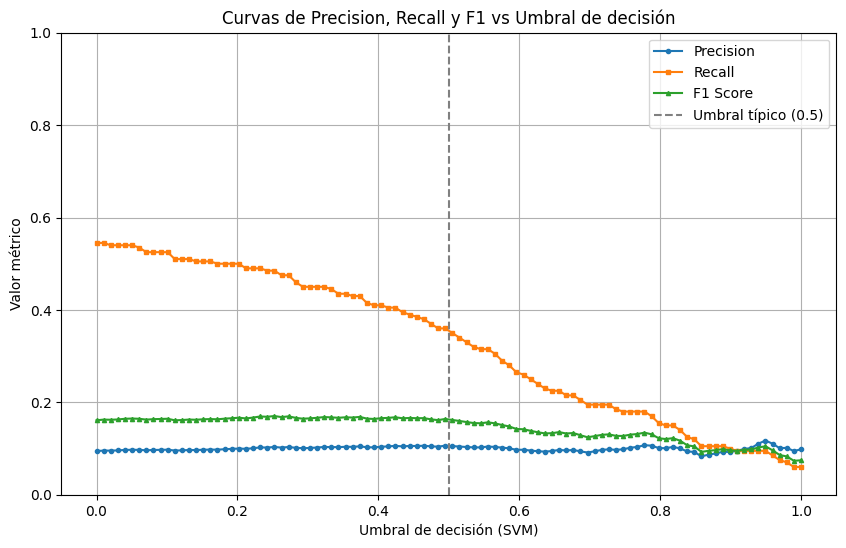

Mejor umbral encontrado: 0.253
F1-score máximo: 0.1703
Precision: 0.1033, Recall: 0.4850
Evaluación con umbral ajustado:
              precision    recall  f1-score   support

           0       0.92      0.58      0.71      2000
           1       0.10      0.48      0.17       200

    accuracy                           0.57      2200
   macro avg       0.51      0.53      0.44      2200
weighted avg       0.84      0.57      0.66      2200

Matriz de confusión:
 [[1158  842]
 [ 103   97]]


In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, classification_report, confusion_matrix

#Obtener decision_function
decision_scores = best_model.decision_function(X_val)

# Umbrales entre 0 y 1
thresholds = np.linspace(0, 1, 100)

precision_list = []
recall_list = []
f1_list = []

#Calcular métricas por umbral
for thresh in thresholds:
    y_pred_thresh = (decision_scores >= thresh).astype(int)
    precision, recall, f1, _ = precision_recall_fscore_support(y_val, y_pred_thresh, average='binary', pos_label=1)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)


plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_list, label="Precision", marker='o', markersize=3)
plt.plot(thresholds, recall_list, label="Recall", marker='s', markersize=3)
plt.plot(thresholds, f1_list, label="F1 Score", marker='^', markersize=3)
plt.axvline(x=0.5, color='gray', linestyle='--', label="Umbral típico (0.5)")
plt.xlabel("Umbral de decisión (SVM)")
plt.ylabel("Valor métrico")
plt.title("Curvas de Precision, Recall y F1 vs Umbral de decisión")
plt.ylim(0, 1) 
plt.legend()
plt.grid(True)
plt.show()

best_index = np.argmax(f1_list)
best_thresh = thresholds[best_index]
print(f"Mejor umbral encontrado: {best_thresh:.3f}")
print(f"F1-score máximo: {f1_list[best_index]:.4f}")
print(f"Precision: {precision_list[best_index]:.4f}, Recall: {recall_list[best_index]:.4f}")

y_pred_best = (decision_scores >= best_thresh).astype(int)
print("Evaluación con umbral ajustado:")
print(classification_report(y_val, y_pred_best))
print("Matriz de confusión:\n", confusion_matrix(y_val, y_pred_best))


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

decision_scores_test = best_model.decision_function(X_test)

optimal_threshold = 0.253

y_pred_test = (decision_scores_test >= optimal_threshold).astype(int)

print("Evaluación en conjunto de prueba con umbral ajustado")
print(classification_report(y_test, y_pred_test))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_test))

Evaluación en conjunto de prueba con umbral ajustado
              precision    recall  f1-score   support

           0       0.91      0.60      0.72      2000
           1       0.10      0.43      0.16       200

    accuracy                           0.58      2200
   macro avg       0.51      0.52      0.44      2200
weighted avg       0.84      0.58      0.67      2200

Matriz de confusión:
 [[1200  800]
 [ 113   87]]
